In [1]:
# import the necessary libraries
import numpy as np
import pandas as pd

# Visualisation libraries
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

## Reading and Understanding the dataset

In [2]:
# Loading the data as df
df=pd.read_csv('AirQuality_India.csv')
#Converting String to Datetime
df['Date'] = pd.to_datetime(df['Date'])
print(np.dtype(df['Date']))
df.rename(columns = {'AQI_Bucket':'Air_quality'}, inplace = True)
df.head()

datetime64[ns]


,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,Air_quality
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN


In [3]:
df.shape

(29531, 16)

In [4]:
df.columns

Index(['City', 'Date', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2',
       'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI', 'Air_quality'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   City         29531 non-null  object        
 1   Date         29531 non-null  datetime64[ns]
 2   PM2.5        24933 non-null  float64       
 3   PM10         18391 non-null  float64       
 4   NO           25949 non-null  float64       
 5   NO2          25946 non-null  float64       
 6   NOx          25346 non-null  float64       
 7   NH3          19203 non-null  float64       
 8   CO           27472 non-null  float64       
 9   SO2          25677 non-null  float64       
 10  O3           25509 non-null  float64       
 11  Benzene      23908 non-null  float64       
 12  Toluene      21490 non-null  float64       
 13  Xylene       11422 non-null  float64       
 14  AQI          24850 non-null  float64       
 15  Air_quality  24850 non-null  object        
dtypes: d

In [6]:
df.describe()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
count,24933.000000,18391.000000,25949.000000,25946.000000,25346.000000,19203.000000,27472.000000,25677.000000,25509.000000,23908.000000,21490.000000,11422.000000,24850.000000
mean,67.450578,118.127103,17.574730,28.560659,32.309123,23.483476,2.248598,14.531977,34.491430,3.280840,8.700972,3.070128,166.463581
std,64.661449,90.605110,22.785846,24.474746,31.646011,25.684275,6.962884,18.133775,21.694928,15.811136,19.969164,6.323247,140.696585
min,0.040000,0.010000,0.020000,0.010000,0.000000,0.010000,0.000000,0.010000,0.010000,0.000000,0.000000,0.000000,13.000000
25%,28.820000,56.255000,5.630000,11.750000,12.820000,8.580000,0.510000,5.670000,18.860000,0.120000,0.600000,0.140000,81.000000
50%,48.570000,95.680000,9.890000,21.690000,23.520000,15.850000,0.890000,9.160000,30.840000,1.070000,2.970000,0.980000,118.000000
75%,80.590000,149.745000,19.950000,37.620000,40.127500,30.020000,1.450000,15.220000,45.570000,3.080000,9.150000,3.350000,208.000000
max,949.990000,1000.000000,390.680000,362.210000,467.630000,352.890000,175.810000,193.860000,257.730000,455.030000,454.850000,170.370000,2049.000000


In [7]:
# Data availability
print(f"The available data we have is between {df['Date'].min()} and {df['Date'].max()}")

The available data we have is between 2015-01-01 00:00:00 and 2020-07-01 00:00:00


In [8]:
# How many rows available for each City.
df['City'].value_counts()

Ahmedabad             2009
Delhi                 2009
Mumbai                2009
Bengaluru             2009
Lucknow               2009
Chennai               2009
Hyderabad             2006
Patna                 1858
Gurugram              1679
Visakhapatnam         1462
Amritsar              1221
Jorapokhar            1169
Jaipur                1114
Thiruvananthapuram    1112
Amaravati              951
Brajrajnagar           938
Talcher                925
Kolkata                814
Guwahati               502
Coimbatore             386
Shillong               310
Chandigarh             304
Bhopal                 289
Ernakulam              162
Kochi                  162
Aizawl                 113
Name: City, dtype: int64

In [9]:
df[df['Air_quality']=='Severe']['City'].value_counts() 
#Here Ahmedabad,Delhi,Patna seems to be highest in case and Ahemdabad to be very much higher than others.

Ahmedabad     638
Delhi         239
Patna         174
Lucknow       110
Gurugram       95
Talcher        24
Jorapokhar     18
Kolkata        13
Amritsar        7
Hyderabad       7
Chennai         6
Guwahati        5
Jaipur          2
Name: City, dtype: int64

In [10]:
pd.to_datetime(df[(df['Air_quality']=='Severe')&(df['City']=='Ahmedabad')]['Date']).dt.year.value_counts()

2018    277
2019    224
2015     51
2017     37
2020     29
2016     20
Name: Date, dtype: int64

* **As we see here,in the city of Ahmedabad year 2018,2019 severe instances has been found and the condition of air quality was harmful.**

# Exploratory Data Analysis

## Missing value Treatment

In [11]:
def missing_value_table(df):
    values = df.isnull().sum()
    percentage = 100*df.isnull().sum()/len(df)
    table = pd.concat([values,percentage.round(2)],axis=1)
    table.columns = ['No of missing values','% of missing values']
    return table[table['No of missing values']!=0].sort_values('% of missing values',ascending=False).style.background_gradient('Reds')
missing_value_table(df)    

,No of missing values,% of missing values
Xylene,18109,61.320000
PM10,11140,37.720000
NH3,10328,34.970000
Toluene,8041,27.230000
Benzene,5623,19.040000
AQI,4681,15.850000
Air_quality,4681,15.850000
PM2.5,4598,15.570000
NOx,4185,14.170000
O3,4022,13.620000


<AxesSubplot:>

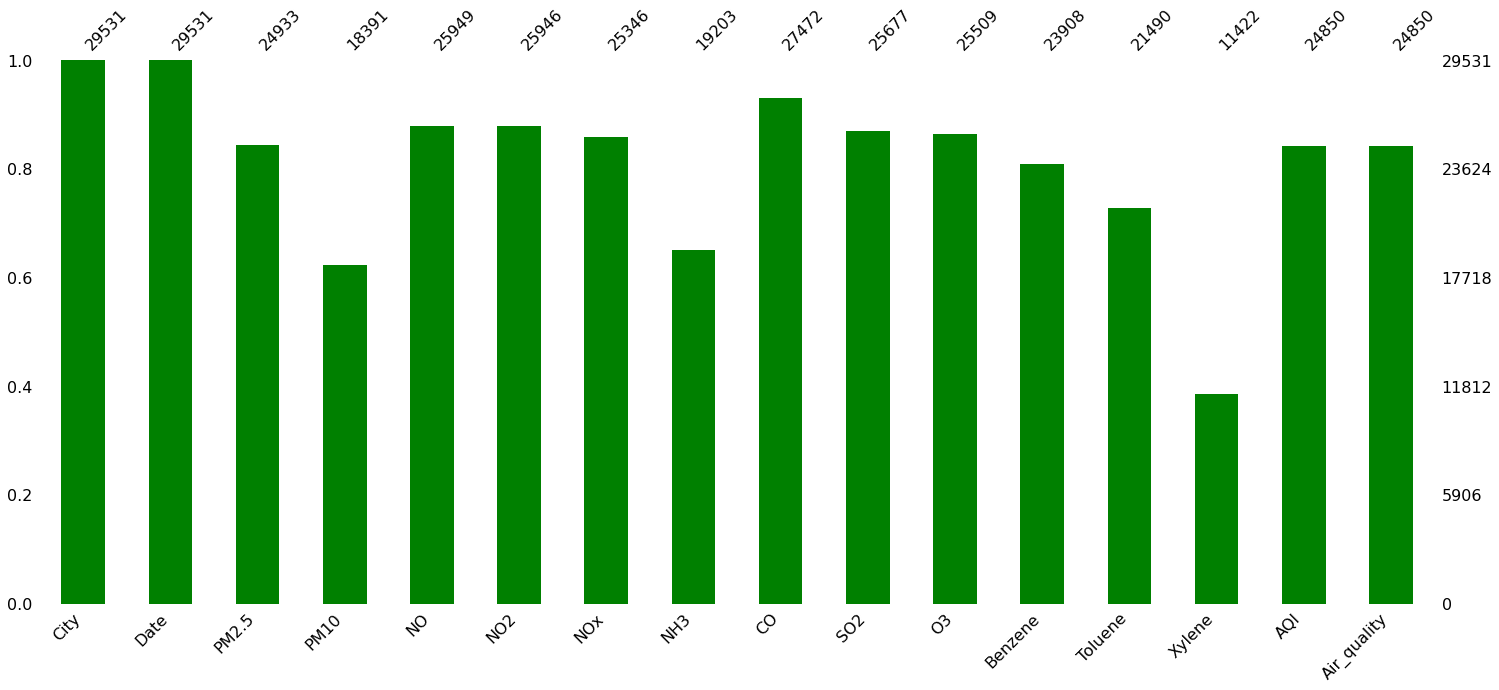

In [12]:
#import the missingno plot and checking missing values.
import missingno 
missingno.bar(df, color="green")

* In this bar chart of missing values, we can see that **Xylene, PM10** and **NH3** is mostly have the missing values.
* **we can also see that we don't have any missing values in the City and Date column.**
* **We can see that there is a relation between AQI and AQI_Bucket. when the AQI is missing, AQI_Bucket is also missing.**

In [13]:
# Treating missing values in the copy of df
df1=df.copy()
df1_columns=['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2',
       'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI']
for i in df1_columns:
    df1[i]=df1[i].fillna(df1[i].median())
df1['Air_quality']=df1['Air_quality'].fillna('Moderate')

In [14]:
df1.isna().sum()

City           0
Date           0
PM2.5          0
PM10           0
NO             0
NO2            0
NOx            0
NH3            0
CO             0
SO2            0
O3             0
Benzene        0
Toluene        0
Xylene         0
AQI            0
Air_quality    0
dtype: int64

## UNIVERIATE ANALYSIS

## Distribusion of AQI 

Severe           1338
Good             1341
Very Poor        2337
Poor             2781
Satisfactory     8224
Moderate        13510
Name: Air_quality, dtype: int64


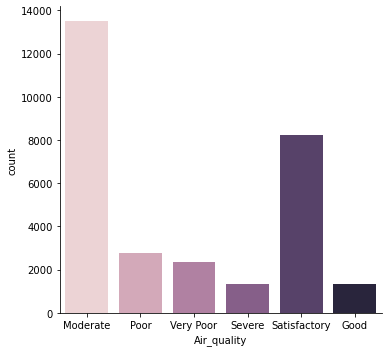

In [15]:
# Plotting distribusion of Air quality
print(df1['Air_quality'].value_counts(ascending= True))
sns.catplot(x = 'Air_quality', kind= "count", palette = "ch: 2.87", height=5, aspect=1.1, data = df1)

**Mainly there are six categories of AQI which we observe: Good, Satisfactory, Moderate, Poor, Very Poor and Severe.**

## Range of AQI

Minimum and maximum range of AQI: 13.0 - 2049.0


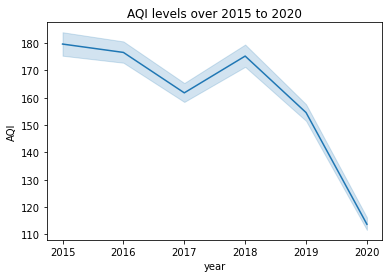

In [16]:
df2=df1.copy()
df2['year'] = df2['Date'].dt.year
print(f"Minimum and maximum range of AQI: {df2.AQI.min()} - {df2.AQI.max()}")
plt.title('AQI levels over 2015 to 2020')
sns.lineplot(x='year',y='AQI', data=df2);

* **We observe a general decline in the AQI levels over the years which shows increase in Air Quality.**

## Histogram of features

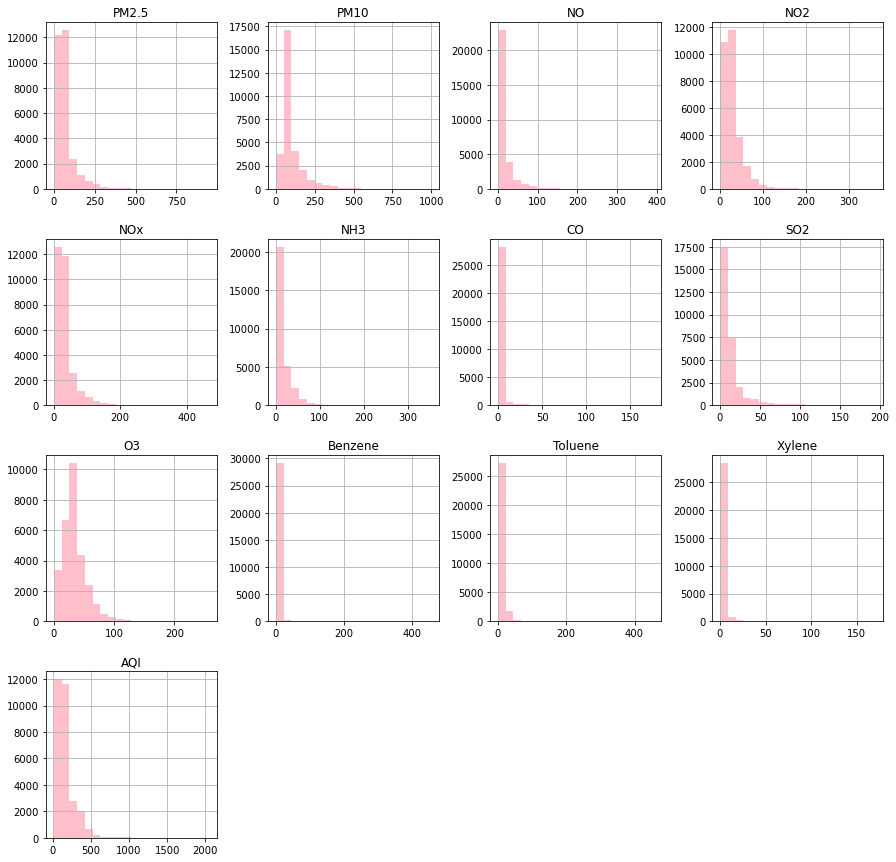

In [17]:
a=df1.drop('Date',axis=1)
plt.rcParams['figure.figsize']=(15,15)
a.hist(bins=20,color='pink')
plt.show()

#### Each of the histograms are right Skewed or Positively Skewed. That means, Mean, Median, Modes are all different.

## BIVARIATE ANALYSIS

## Correlation Analysis

Text(0.5, 1.0, 'Correlation Analysis')

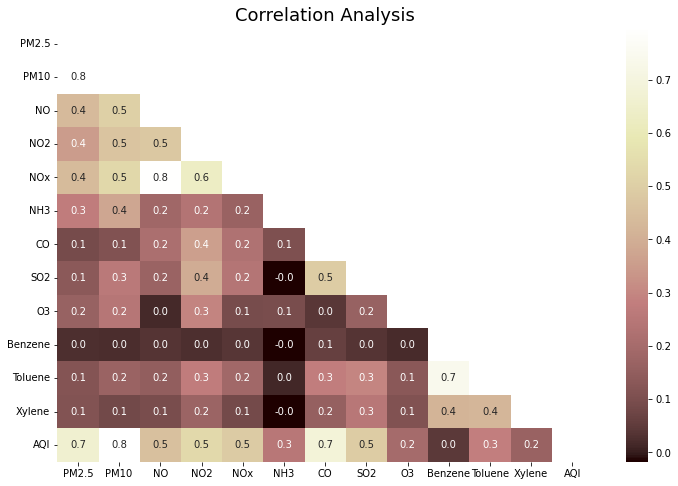

In [18]:
#Analyze the Correlation between Columns.
#correlation analysis

plt.figure(figsize=(12,8))

mask=np.triu(df.corr(method='pearson'))
sns.heatmap(df.corr(method='pearson'),
            annot=True,fmt='0.1f',
            mask=mask,
            robust=True,
            cmap='pink')
plt.title('Correlation Analysis', fontsize=18)

* **From the above heatmap, we observe a strong correlation of NO WITH NOX, NO2 WITH NOX AND BENZENE WITH TOLUENE.**

Text(0.5, 1.0, 'Correlation of NO with NOx')

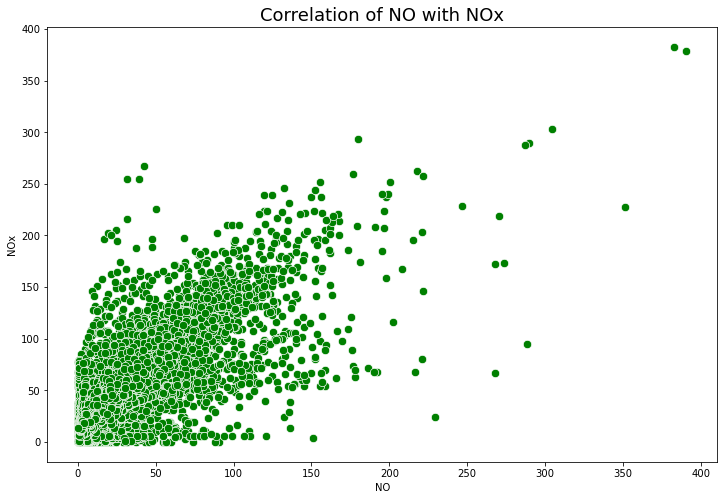

In [19]:
#Let's first visualize their correlation.
# Checking relationship between NO and NOx
plt.figure(figsize=(12,8))
sns.scatterplot(x='NO',y='NOx',data=df,s=70,color='green')
plt.title('Correlation of NO with NOx', fontsize=18)

Text(0.5, 1.0, 'Correlation of NO2 with NOx')

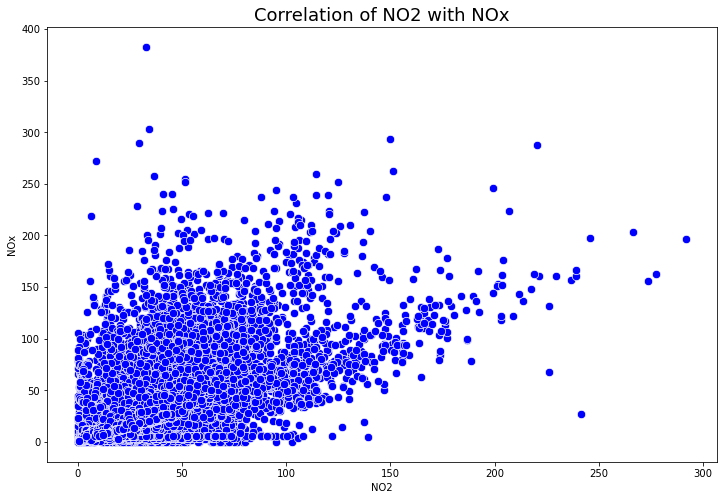

In [20]:
# Checking relationship between NO2 and NOx.
plt.figure(figsize=(12,8))
sns.scatterplot(x='NO2',y='NOx',data=df,s=70,color='Blue')
plt.title("Correlation of NO2 with NOx", fontsize=18)

* **In the First two scatter plots, we observe that there is a correlation between NO, NO2 and NOx and it's obvious because all these three elements are the member of seven gases and compounds group composed of Nitrogen and Oxygen.**

Text(0.5, 1.0, 'Correlation of Benzene with Toluene')

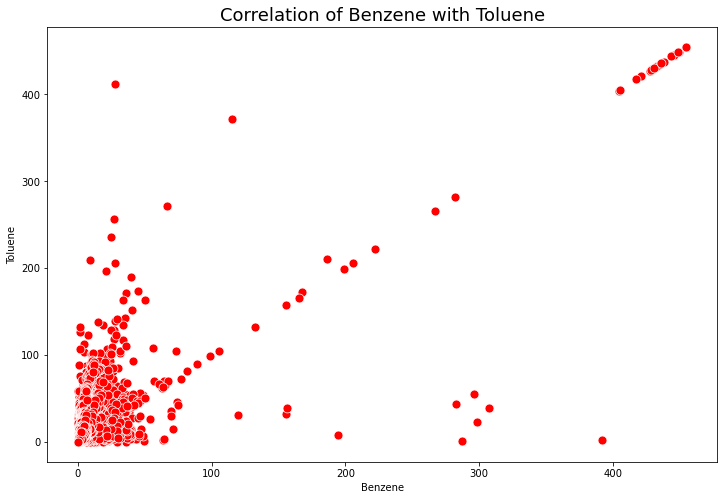

In [21]:
# Checking relationship between Benzene and Toluene.
plt.figure(figsize=(12,8))
sns.scatterplot(x='Benzene',y='Toluene',data=df,s=80,color='Red')
plt.title("Correlation of Benzene with Toluene", fontsize=18)

* **In this plot we observe a correlation between Benzene and Toluene and this time, its again obvious because Benzene, Toluene and Xylene are well known indoor air pollutants. sometimes its called as BTX.**

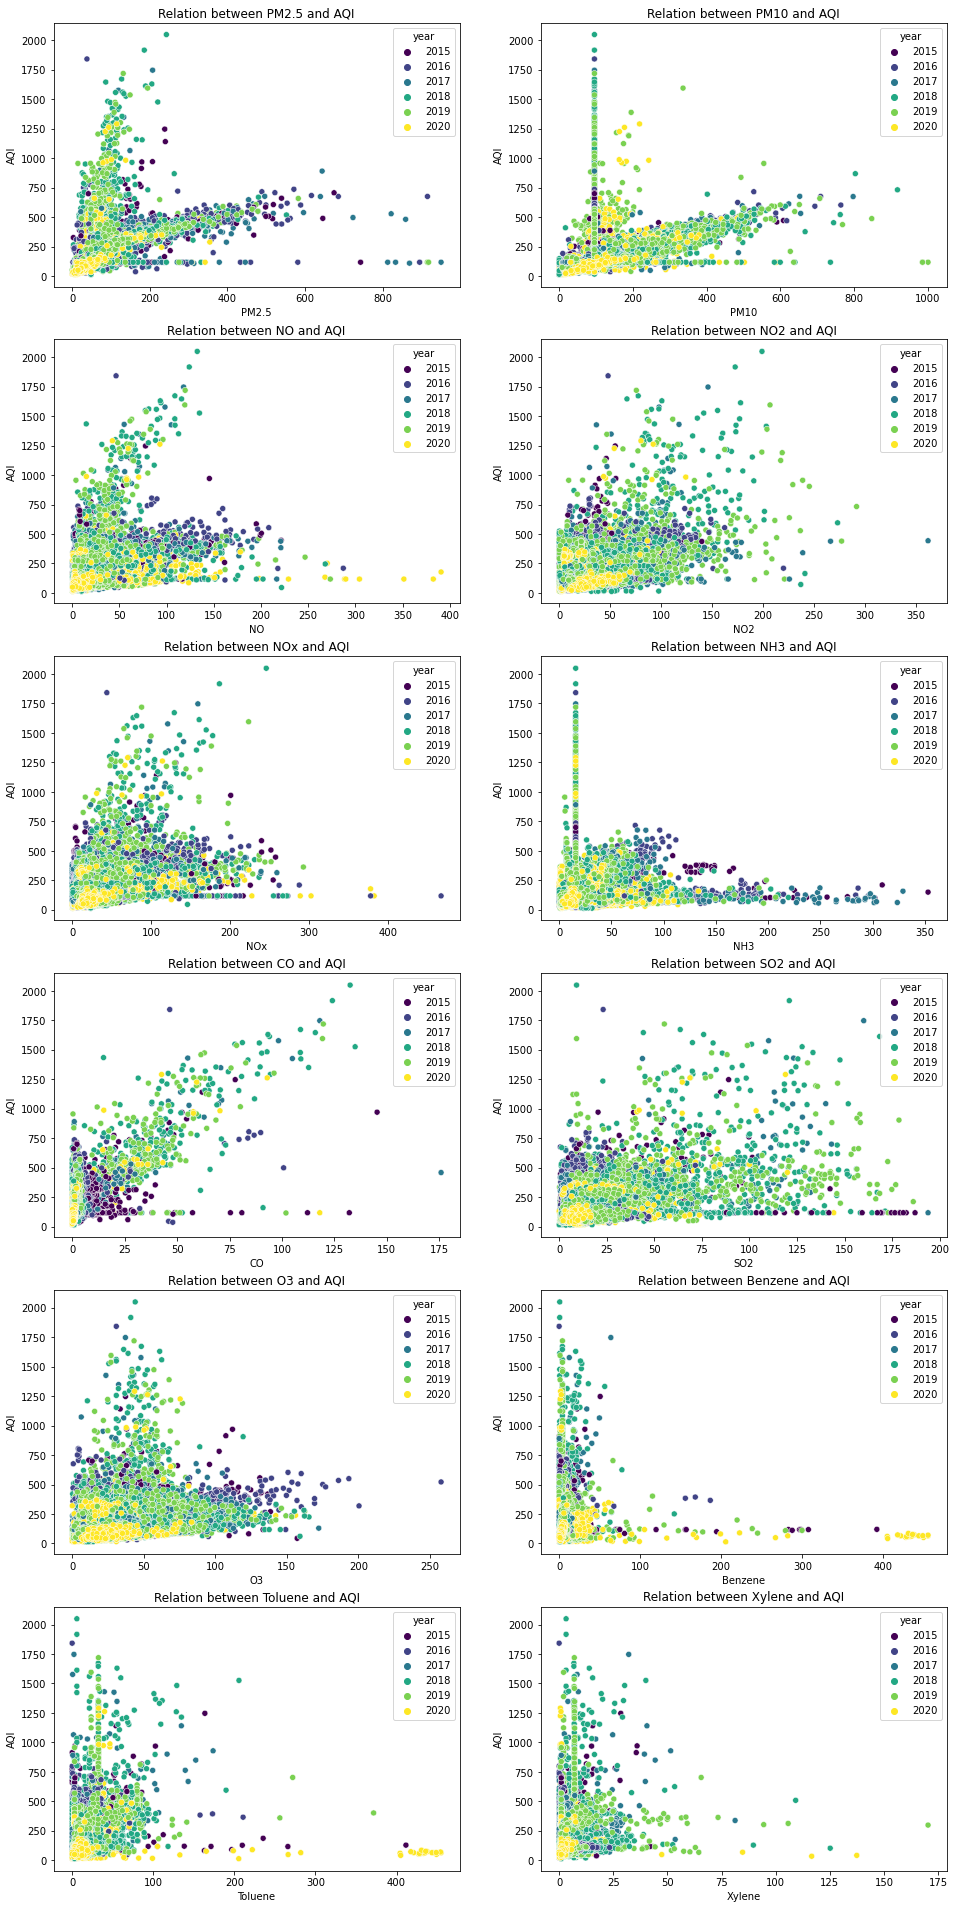

In [22]:
# Checking the relation between each pollution content and AQI
df2=df1.copy()
variables = ['PM2.5','PM10','NO','NO2','NOx','NH3','CO','SO2','O3','Benzene','Toluene','Xylene']
df2['year'] = df2['Date'].dt.year
fig = plt.figure(figsize=(16,34))
for variable,num in zip(variables, range(1,len(variables)+1)):
    ax = fig.add_subplot(6,2,num)
    sns.scatterplot(variable,'AQI', hue='year', data=df2,palette='viridis')
    plt.title('Relation between {} and AQI'.format(variable))
    plt.xlabel(variable)
    plt.ylabel('AQI')

* **PM2.5 -> This shows a inversely proportional behaviour since when it's value remains low the AQI value increases while in other cases when its value increases the AQI value reamins low.**
* **PM10 -> This also shows an inverse behaviour except for the fact that even when PM10 value is less AQI value doesn't increase much.**

## The pollution levels with repect to time

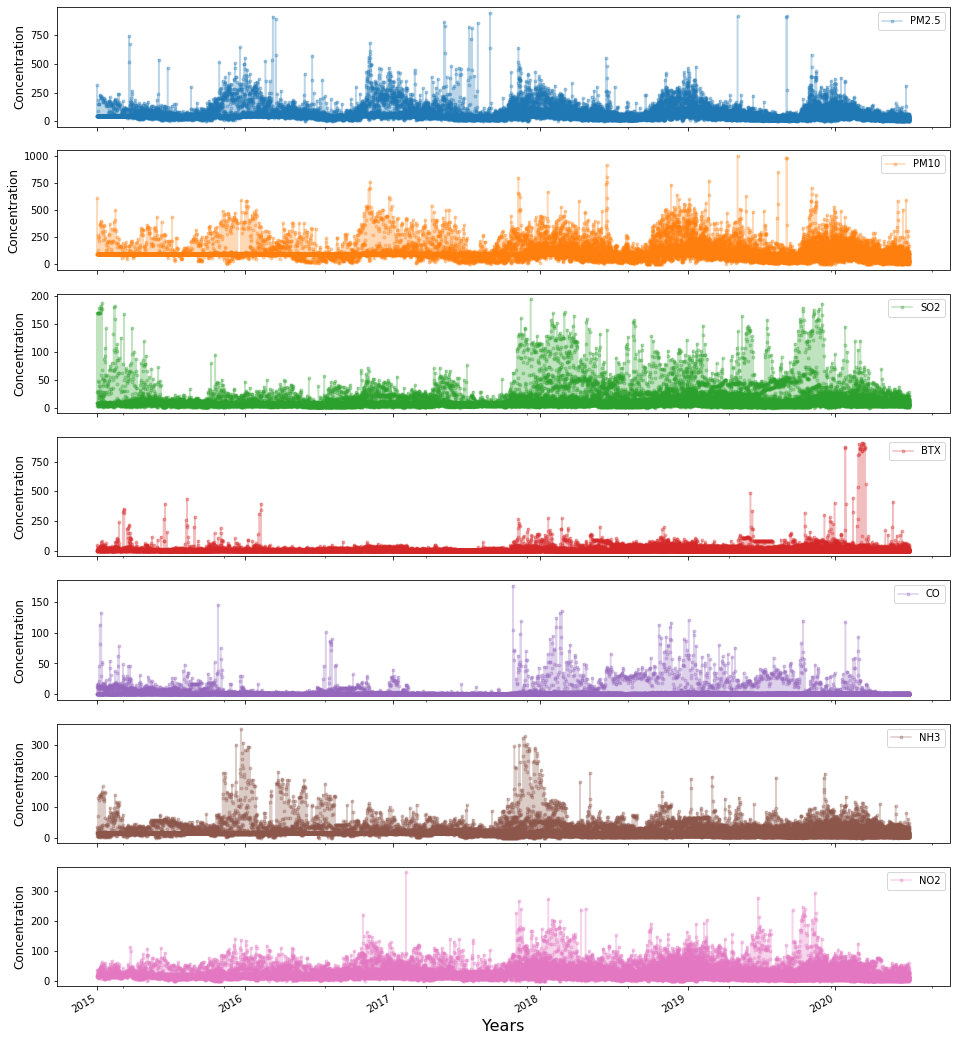

In [23]:
#The pollution levels with repect to time
df2=df1.copy()
df2.set_index('Date',inplace=True) 
df2['BTX'] = df2['Xylene'] + df2['Toluene'] + df2['Benzene']
pollutants=['PM2.5','PM10','SO2','BTX','CO','NH3','NO2']

axes=df2[pollutants].plot(marker='.',figsize=(16,20),subplots=True,alpha=0.3)
for axes in axes:
    axes.set_xlabel('Years',fontsize=16)
    axes.set_ylabel('Concentration',fontsize=12)
plt.show()

* **There are indications of seasonality towards the increase in PM2.5 and PM10 levels.**
* **We should take a closer look to determine the exact nature of the trend.**
* **We can also observe a clear increase in SO2, CO and BTX levels from 2018 onwards.**

In [24]:
df2=df1.copy()
df2['year'] = df2['Date'].dt.year
df2['year'] = df2['year'].astype(str)
temp = df2.groupby(['year'])[['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 
                                                  'NH3', 'CO', 'SO2','O3', 'Benzene', 
                                                  'Toluene', 'Xylene', 'AQI']].median()
temp.style.background_gradient(cmap="Reds")

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
year,,,,,,,,,,,,,
2015,48.570000,95.680000,9.890000,21.290000,22.270000,15.850000,1.580000,9.160000,30.840000,1.070000,2.970000,0.980000,118.000000
2016,48.570000,95.680000,9.890000,21.690000,23.520000,15.850000,0.960000,8.705000,30.840000,1.070000,2.970000,0.980000,118.000000
2017,48.570000,95.680000,9.890000,21.690000,23.520000,15.850000,0.650000,9.160000,30.840000,1.070000,2.750000,0.980000,118.000000
2018,48.570000,95.680000,10.210000,24.540000,26.540000,15.850000,0.900000,9.210000,30.840000,1.070000,2.970000,0.980000,118.000000
2019,45.970000,95.680000,10.055000,21.640000,24.960000,15.850000,0.890000,9.960000,30.405000,1.070000,2.970000,0.980000,113.000000
2020,35.415000,79.665000,8.520000,16.230000,19.860000,15.485000,0.760000,9.160000,31.415000,1.070000,2.970000,0.980000,96.000000


* **We can see in 2020, there has been a decrease in air pollution.And we all know it may be because of effects of covid19 and lockdown.This is the world's largest lockdown.**

## Average AQI over the Years

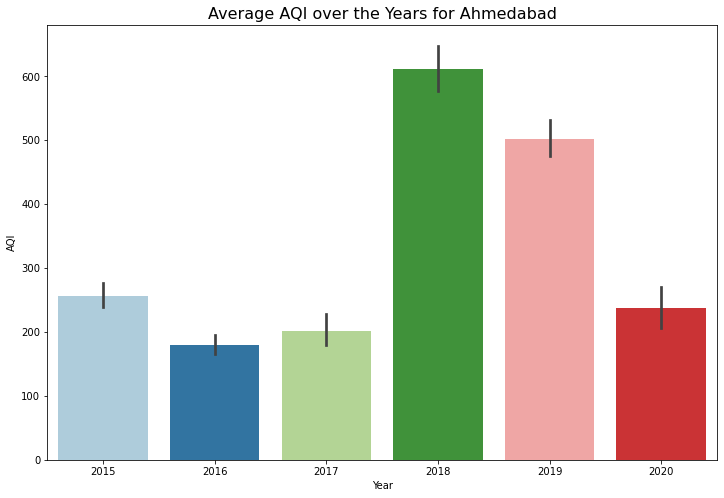

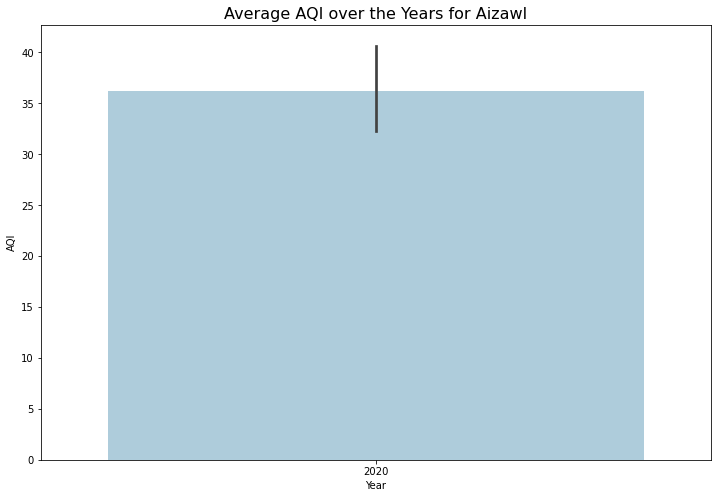

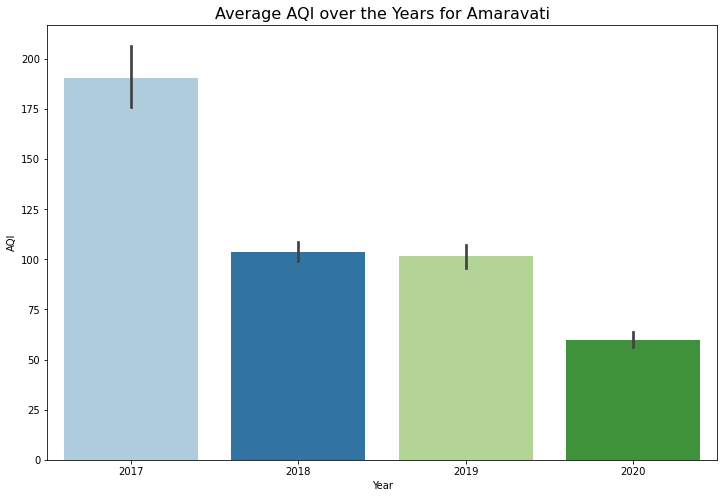

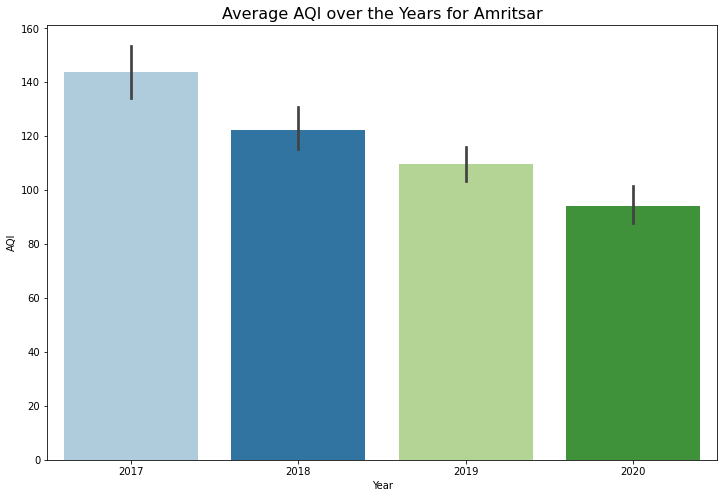

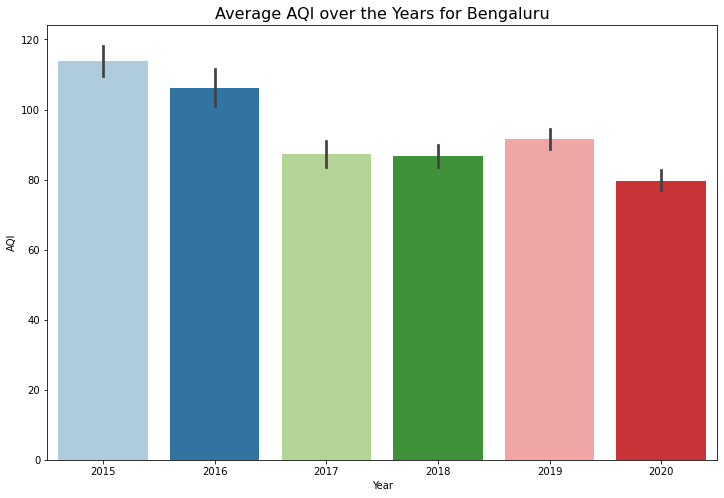

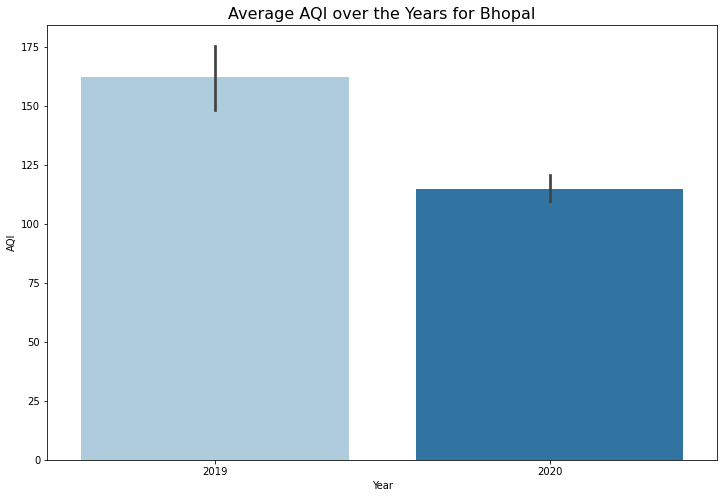

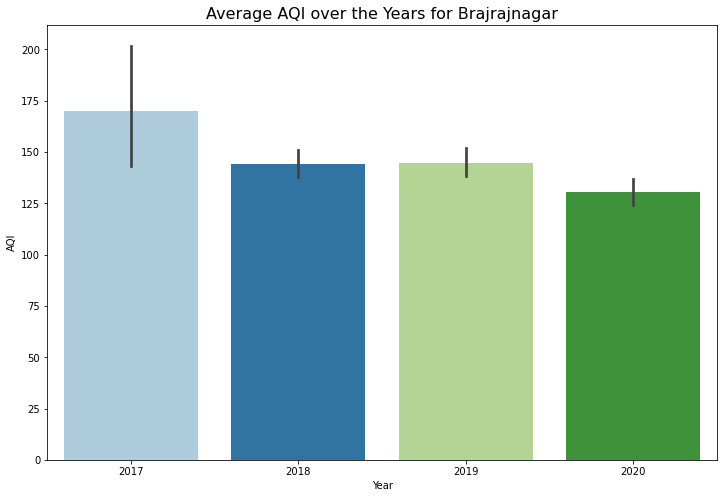

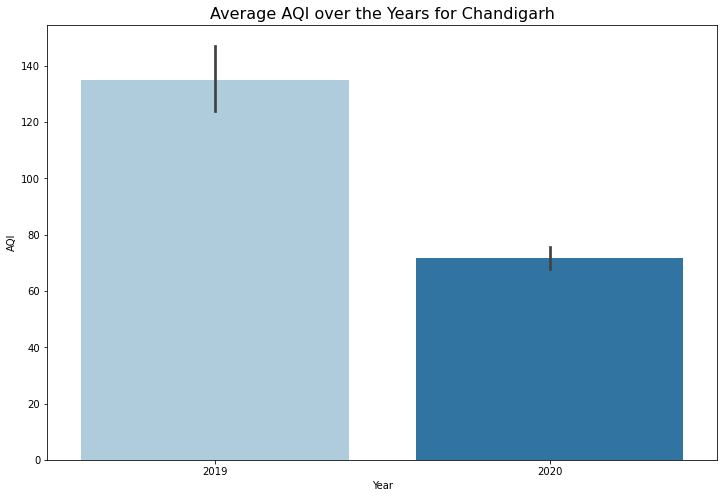

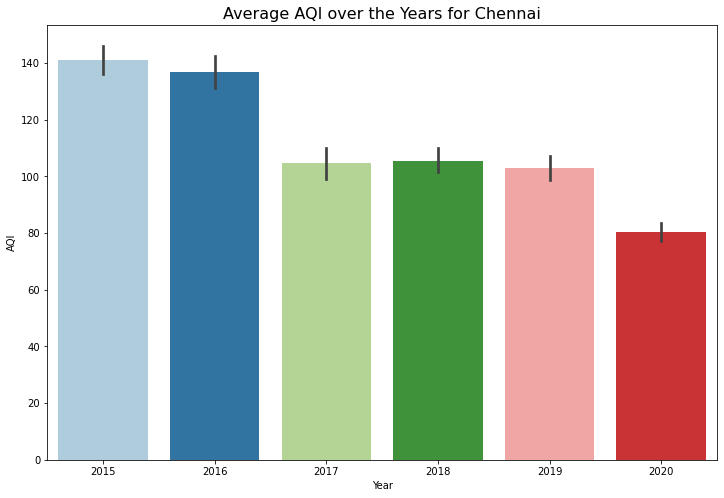

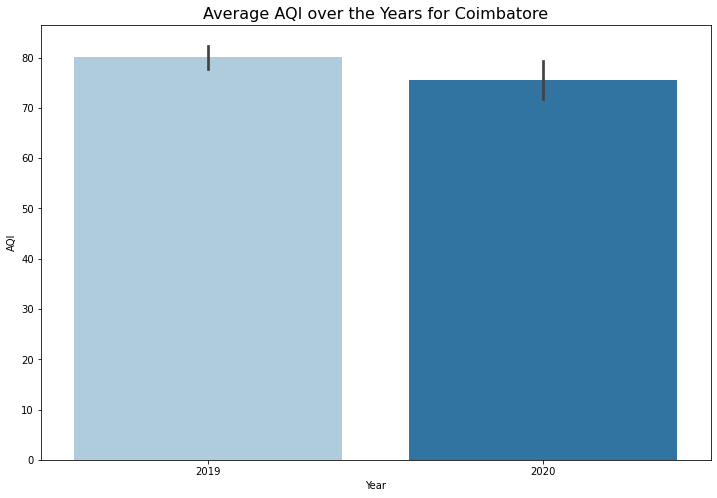

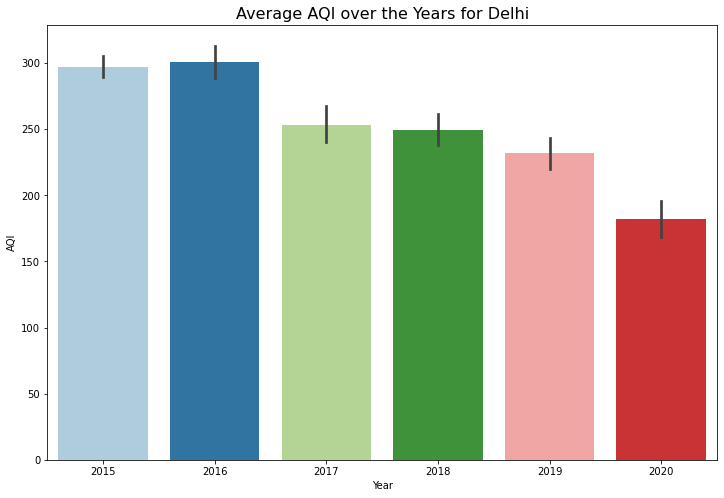

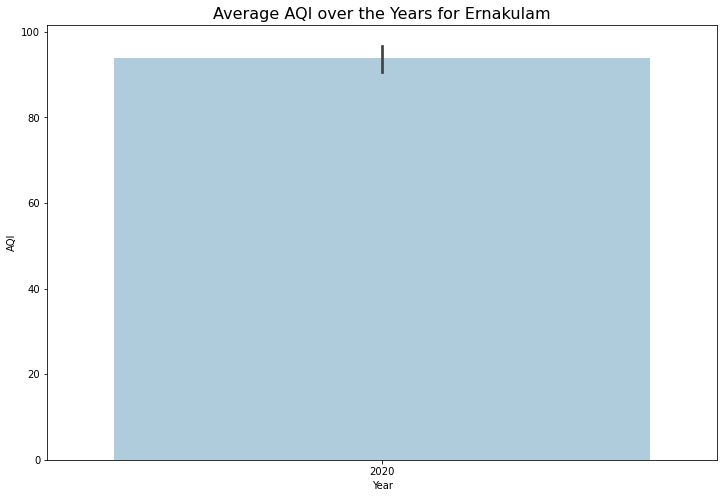

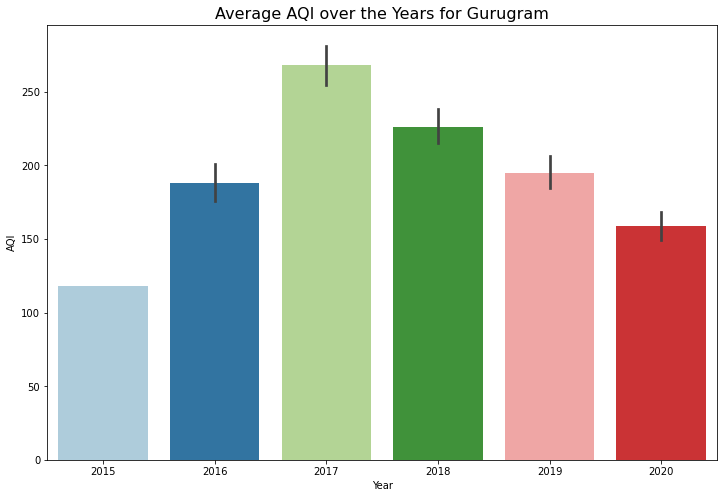

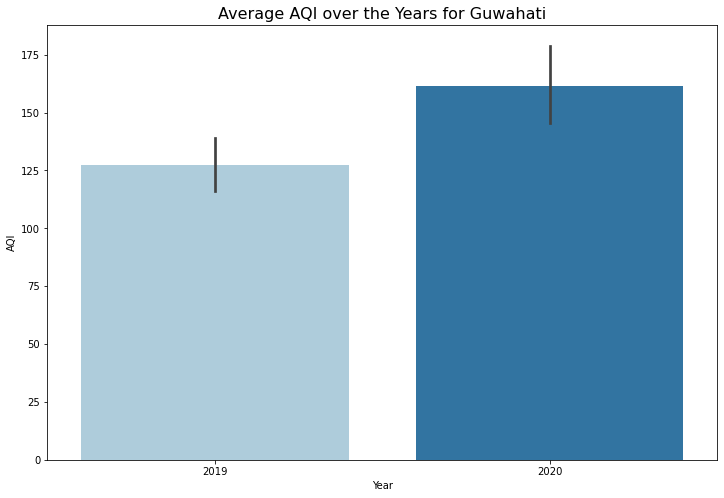

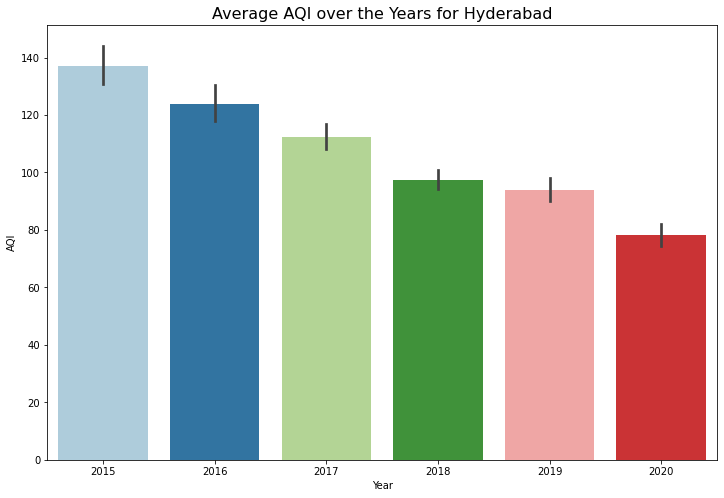

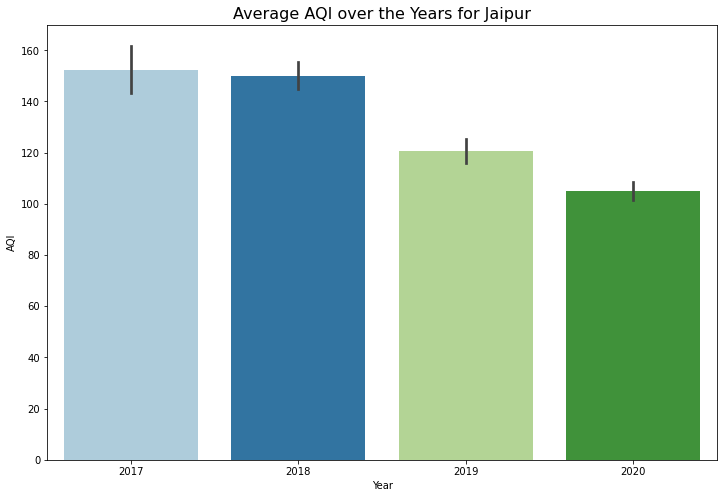

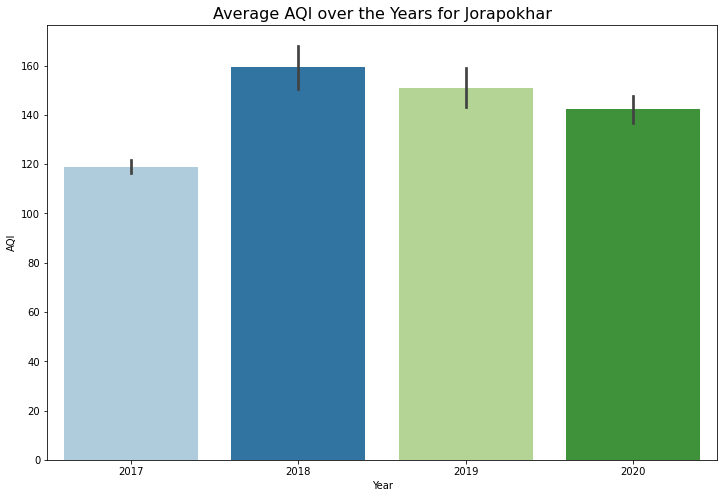

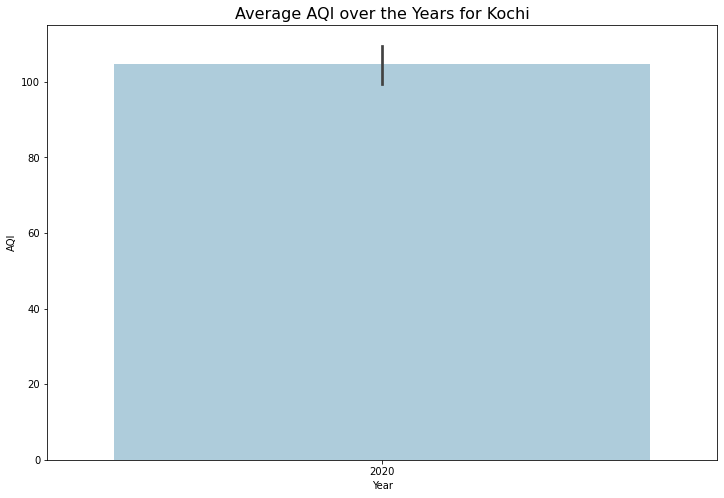

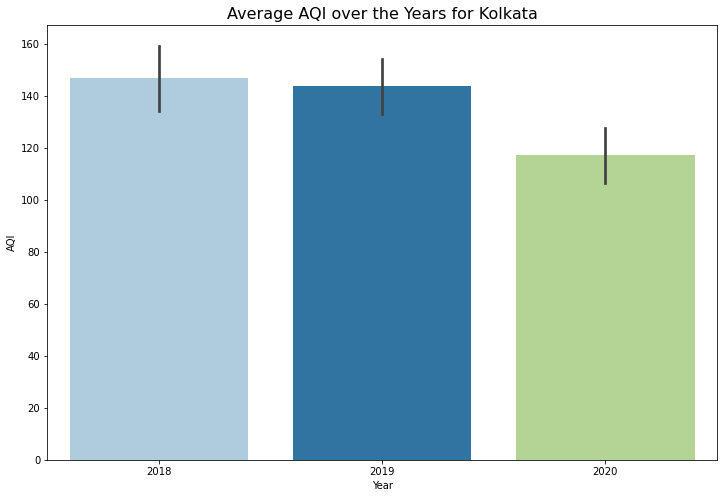

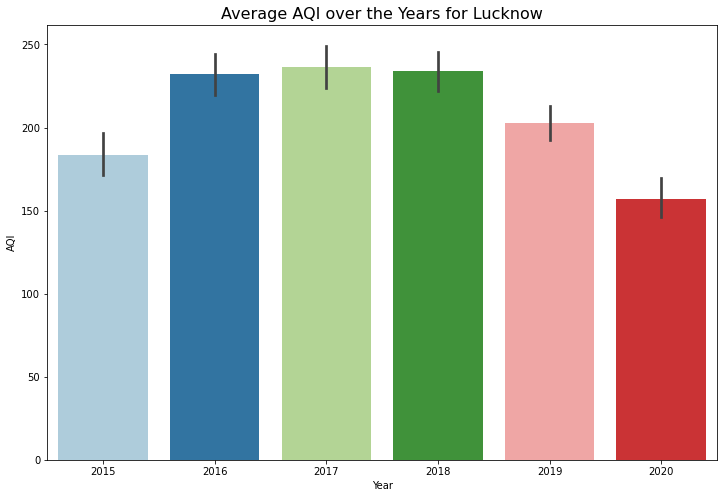

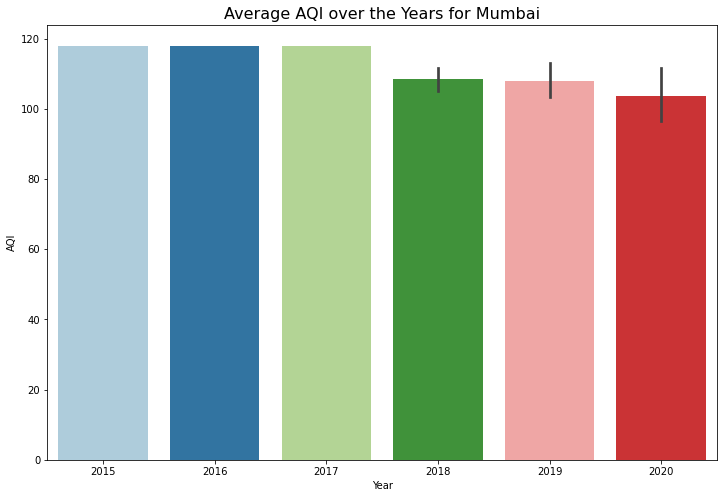

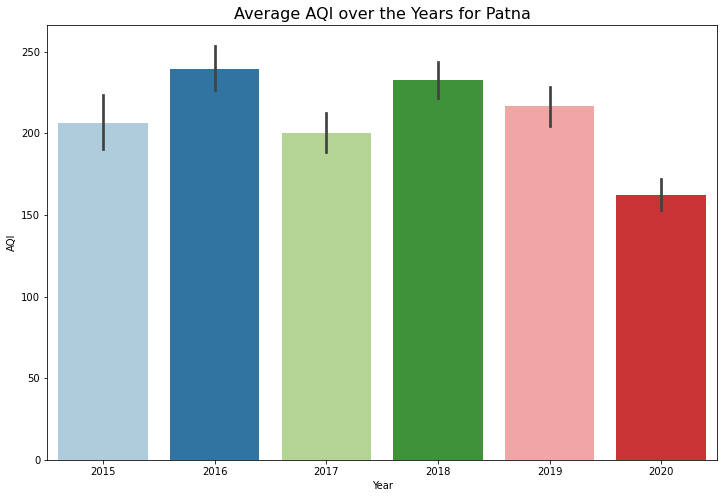

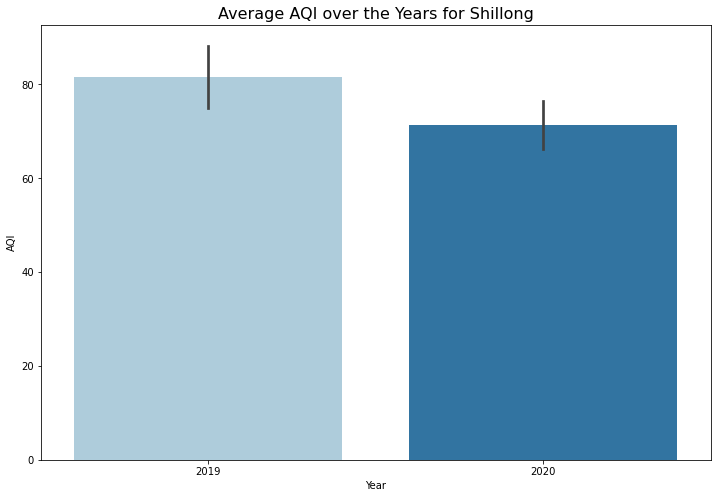

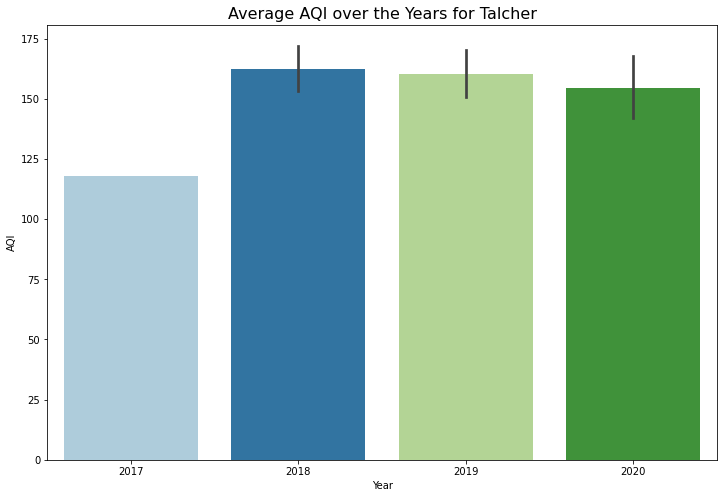

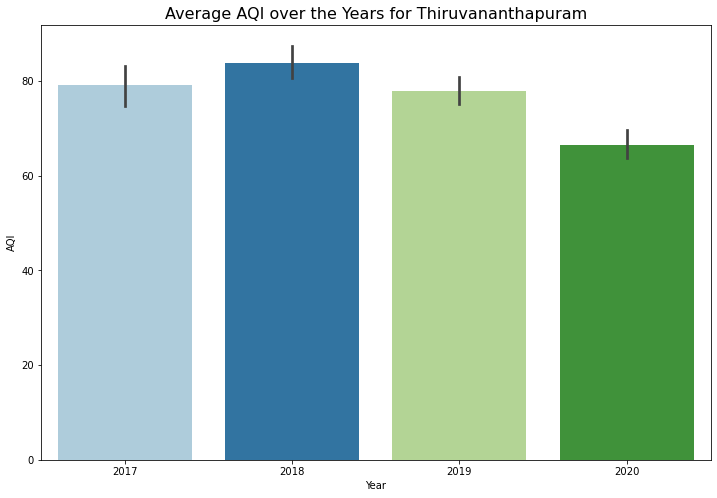

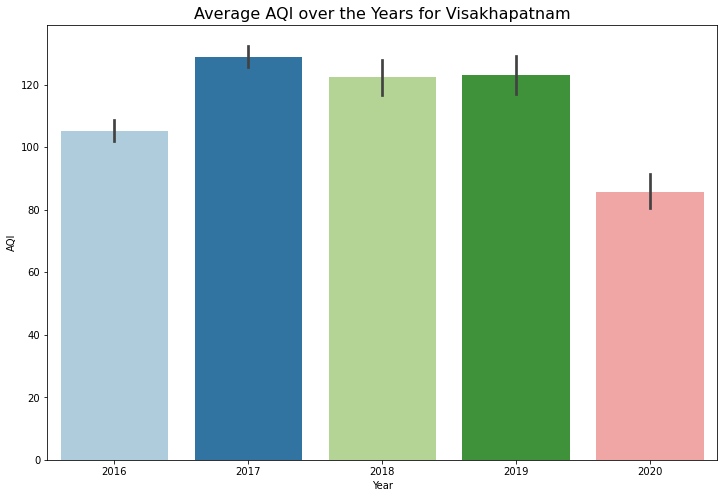

In [25]:
# Average AQI over the Years for different Cities.
df2=df1.copy()
df2['City'][df2['AQI']>=500].value_counts()
cols = df2['City'].unique()
df2['Year'] = df2.Date.dt.year.astype(int)
for col in cols:
    plt.figure(figsize=(12,8))
    x= df2[df2['City']==col]
    sns.barplot(x='Year', y='AQI', data=x, palette ='Paired')
    plt.title(f"Average AQI over the Years for {col}", fontsize=16)
    display()

**After analyzing the Average AQI level for different cities over Years, we found that most of the cities are performing good to tackle the problem of Air Pollution. Their Average AQI level is shrinking Year by Year**

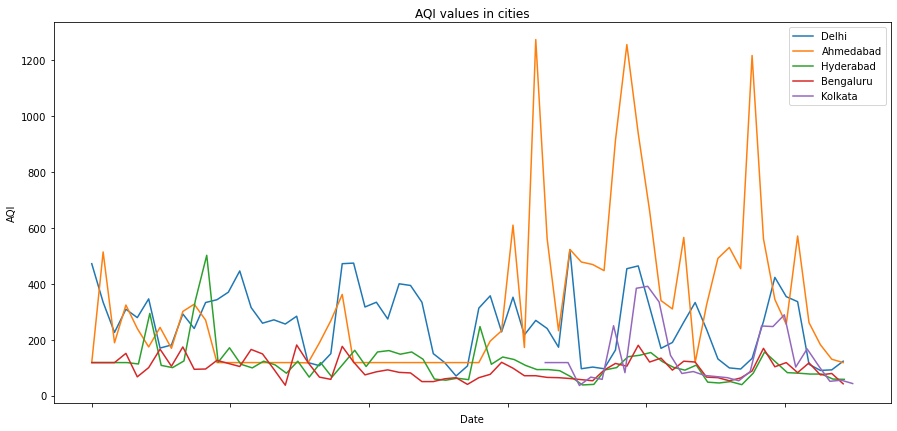

In [26]:
cities = ['Delhi', 'Ahmedabad', 'Hyderabad', 'Bengaluru', 'Kolkata']
fig,ax = plt.subplots(figsize=(15, 7))

for city in cities: 
    sns.lineplot(x="Date", y="AQI", data=df1[df1['City']==city].iloc[::30],label = city)

ax.set_xticklabels(ax.get_xticklabels(cities), rotation=30, ha="left")

ax.set_title('AQI values in cities')
ax.legend()

* **As expected we can see maximum amounts of pollutants in metropolitan cities with large populations and significant 
  commercial and maunfacturing activities.**

## Impact of particular matter on city air quality

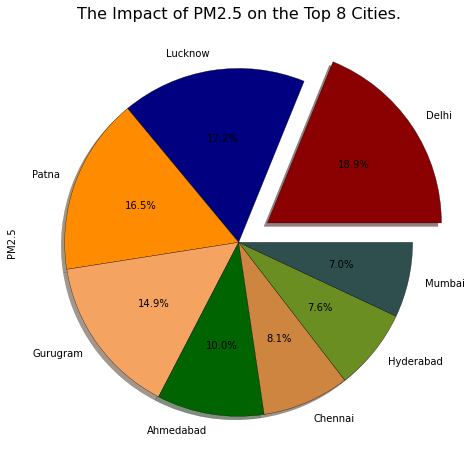

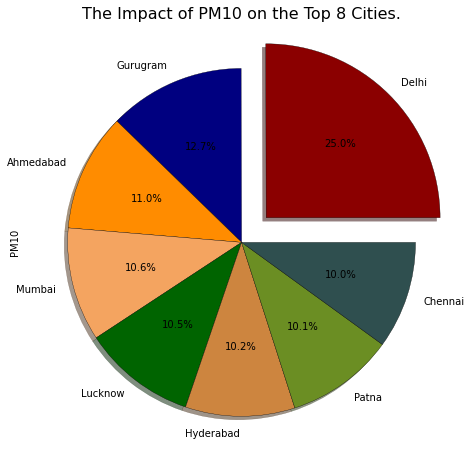

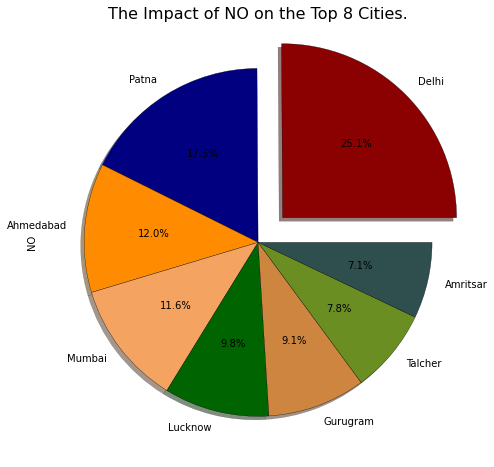

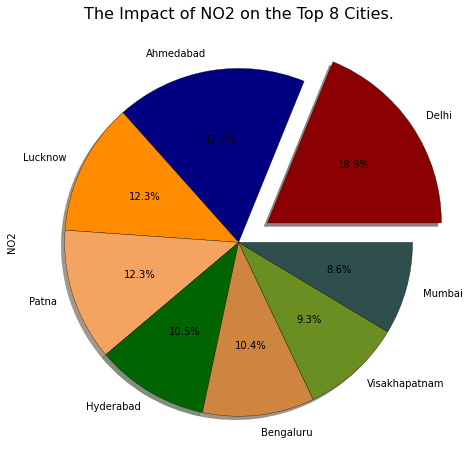

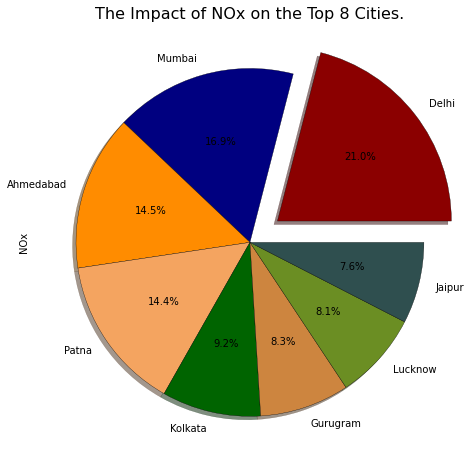

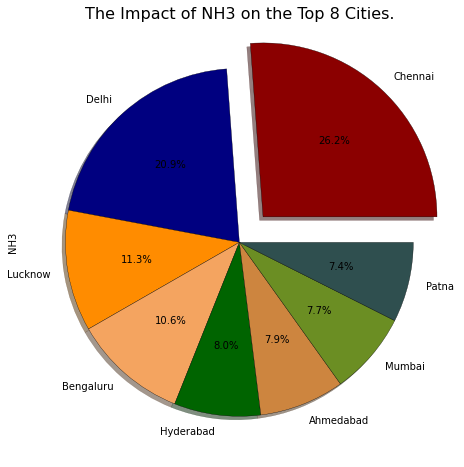

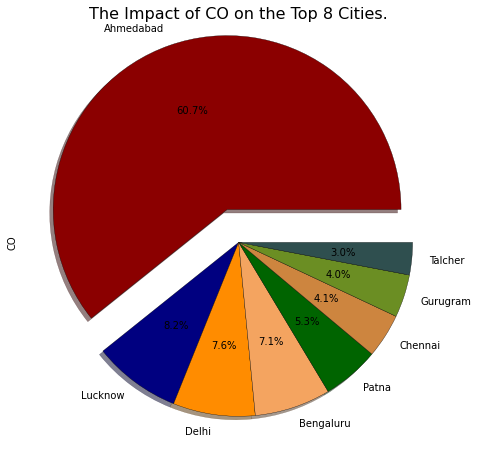

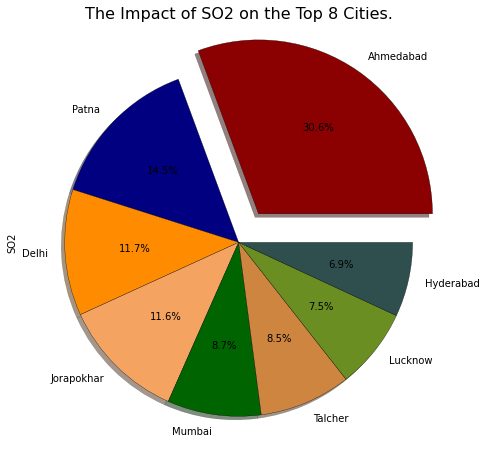

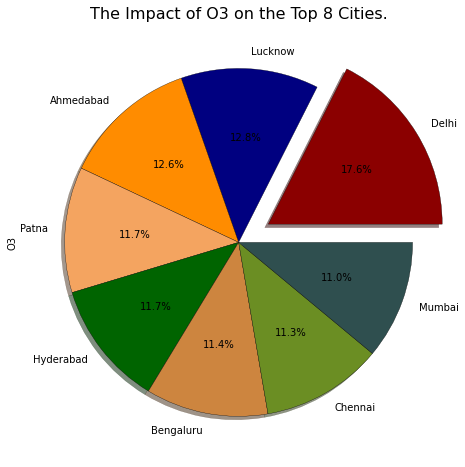

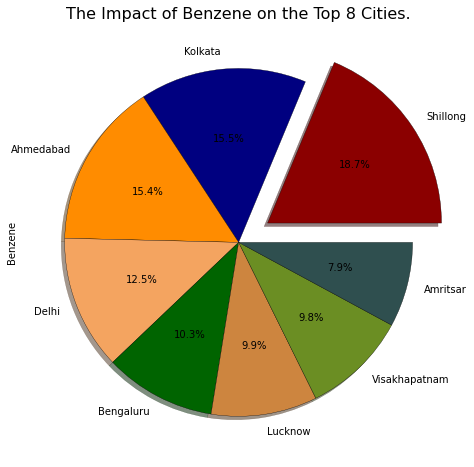

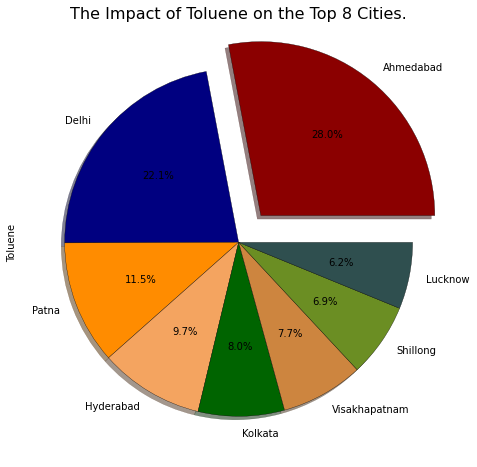

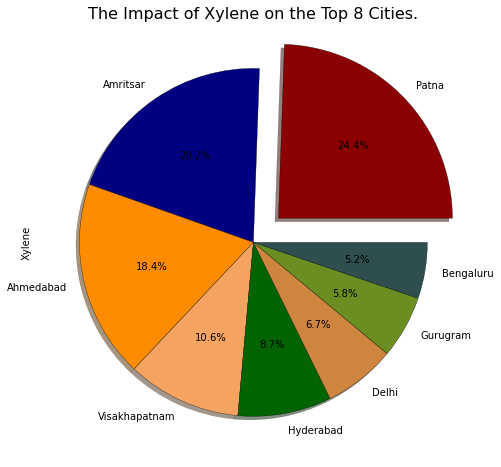

In [27]:
# Plotting Pie Plots for City Air
ex = 0.2,0,0,0,0,0,0,0
cols = 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene'
color = 'darkred', 'navy', 'darkorange', 'sandybrown', 'darkgreen', 'peru', 'olivedrab', 'darkslategray'
for col in cols:
    plt.figure(figsize=(12,8))
    x= df1.groupby('City')[col].sum().sort_values(ascending=False)
    x.reset_index('City')
    x[ :8].plot.pie(shadow=True, autopct='%1.1f%%', colors=color, explode=ex, wedgeprops={'edgecolor':'black', 'linewidth':0.3})
    plt.title(f"The Impact of {col} on the Top 8 Cities.", fontsize=16)

* **After analyzing the above Pie charts, we observe that 'Ahmedabad', 'Delhi', 'Bengaluru', 'Mumbai', 'Hyderabad' and 'Chennai' are the most polluted cities of India.**
* **Ahmadabad city Air contains 82% of the total Carbon Monoxides(CO) of the Country. Carbon Monooxides is a highly poisenues gas.**
* **Mumbai City Air contains 44% of the total Sulpher dioxide(SO2) of the Country.**

## Cities with Good Air Quality.

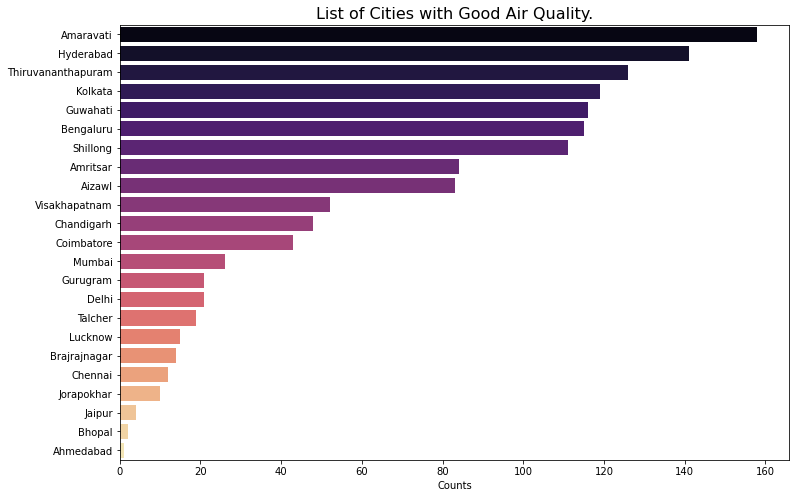

In [28]:
# Cities with Good Air
x= pd.DataFrame(df1['City'][df1['AQI']<=50].value_counts())
x= x.rename(columns={'City':'Counts'})
plt.figure(figsize=(12,8))
sns.barplot(x='Counts', y=x.index, data=x, palette= 'magma')
plt.title("List of Cities with Good Air Quality.", fontsize=16);

* **we observe that Amaravati and Hyderabad are the Top 2 City with the Good Air Quality. For more than 200 times, these two cities encounter AQI less than 50 while it is hard for other cities to get it for more than 150.**

## Preprocessing

### Missing Value treatment

In [3]:
# let us check the percentage of missing values in each column
(df.isnull().sum()/df.shape[0]*100).sort_values(ascending=False)

Xylene         61.322001
PM10           37.723071
NH3            34.973418
Toluene        27.229014
Benzene        19.041008
AQI            15.851139
Air_quality    15.851139
PM2.5          15.570079
NOx            14.171549
O3             13.619586
SO2            13.050692
NO2            12.139785
NO             12.129626
CO              6.972334
City            0.000000
Date            0.000000
dtype: float64

* **All columns have missing values excluding Date and City colunms.**
* **Among them Xylene shows higher percentage (61%) of missing values.**

<AxesSubplot:>

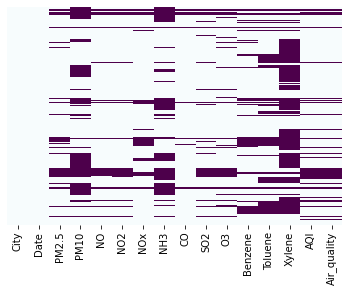

In [4]:
# plotting heat map of missing values for getiing a clear visualization
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='BuPu')

### Imputing the missing values using BFILL

In [3]:
# missing value imputation
df.fillna(method='bfill',inplace=True)
df.isna().sum()

City           0
Date           0
PM2.5          0
PM10           0
NO             0
NO2            0
NOx            0
NH3            0
CO             0
SO2            0
O3             0
Benzene        1
Toluene        1
Xylene         1
AQI            0
Air_quality    0
dtype: int64

In [4]:
# still we are seeing 3 nan values ,so we can drop them.
df.dropna(inplace=True)

<AxesSubplot:>

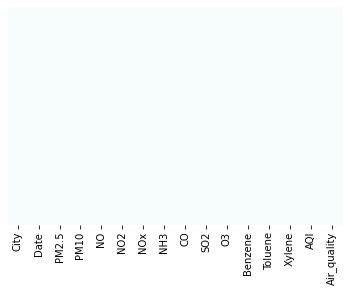

In [5]:
# let us plot heatmap after the imputation
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='BuPu')

* **Now there is no more missing values present in data.**

## Label Encoding

In [8]:
df['Air_quality'].unique()


array(['Poor', 'Very Poor', 'Severe', 'Moderate', 'Satisfactory', 'Good'],
      dtype=object)

In [6]:
#import label encoder
from sklearn import preprocessing

#label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()

#Encode labels in column 'Air_quality'
df['Air_quality']= label_encoder.fit_transform(df['Air_quality'])

df['Air_quality'].unique()

array([2, 5, 4, 1, 3, 0])

In [7]:
df.nunique()

City              26
Date            2009
PM2.5          11716
PM10           12570
NO              5776
NO2             7404
NOx             8156
NH3             5922
CO              1779
SO2             4761
O3              7699
Benzene         1873
Toluene         3608
Xylene          1561
AQI              829
Air_quality        6
dtype: int64

## Outlier detection

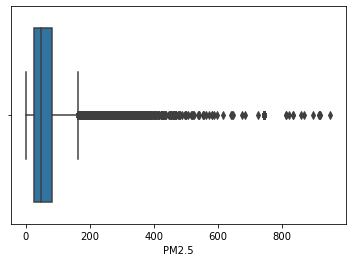

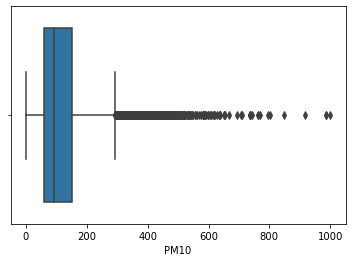

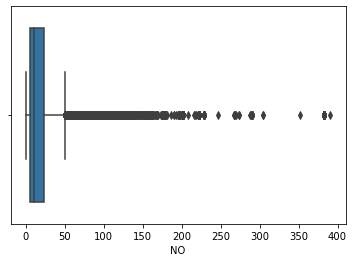

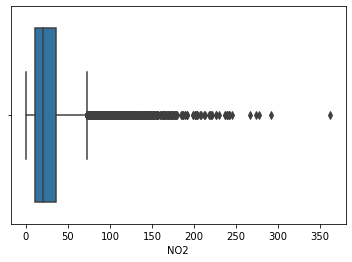

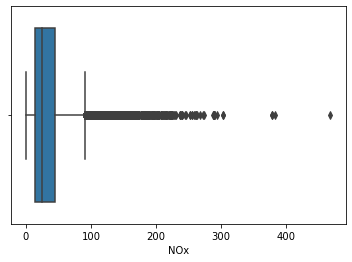

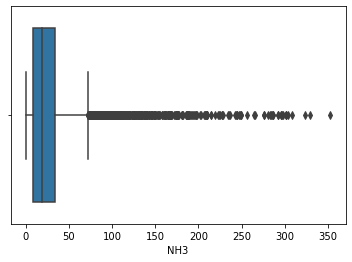

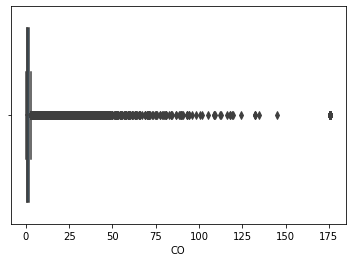

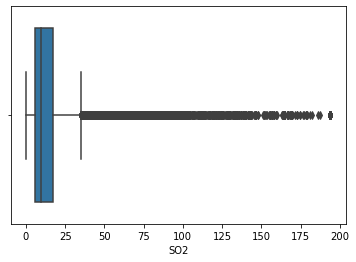

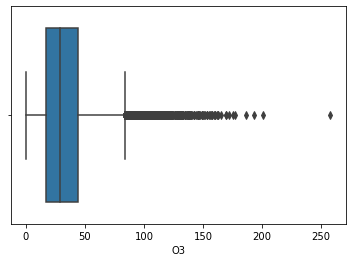

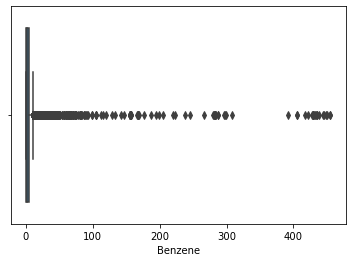

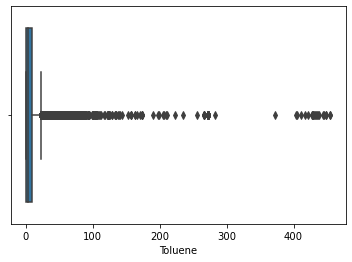

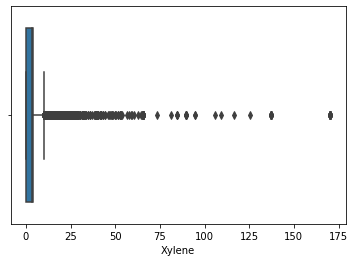

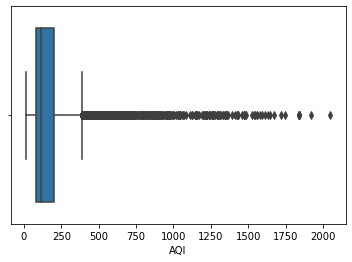

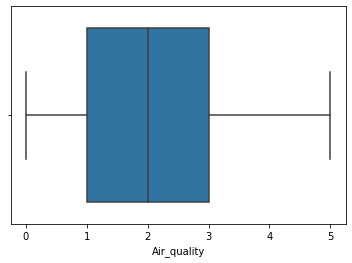

In [11]:
# plotting boxplot of all columns except Date,City and Air_quality columns for checking the outliers present.
col=['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2',
       'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI','Air_quality']
for i in col:
    sns.boxplot(x=df[i])
    plt.show()

* **We can see that all the columns contain huge number of outliers.when removing all these ,will effect the nature of entire data.**

## Feature Reduction and Feature Engineering

In [8]:
# setting Date column as index
df=df.set_index(['Date'])
# Droping column which have low importance
df=df.drop(['City'],axis=1)
df.head()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,Air_quality
Date,,,,,,,,,,,,,,
2015-01-01,73.24,141.54,0.92,18.22,17.15,26.64,0.92,27.64,133.36,0.00,0.02,0.00,209.0,2
2015-01-02,73.24,141.54,0.97,15.69,16.46,26.64,0.97,24.55,34.06,3.68,5.50,3.77,209.0,2
2015-01-03,73.24,141.54,17.40,19.30,29.70,26.64,17.40,29.07,30.70,6.80,16.40,2.25,209.0,2
2015-01-04,73.24,141.54,1.70,18.48,17.97,26.64,1.70,18.59,36.08,4.43,10.14,1.00,209.0,2
2015-01-05,73.24,141.54,22.10,21.42,37.76,26.64,22.10,39.33,39.31,7.01,18.89,2.78,209.0,2


**now, we can  divide the pollution components into two part namely Vehicular Pollution content (PM2.5, PM10, NO2, NH3, CO,) and Industrial Pollution content (CO, SO2, O3, Benzene, Toluene, Xylene) and adding these as new columns.**

In [9]:
df['Vehicular Pollution content'] = df['PM2.5']+df['PM10']+df['NO']+df['NO2']+df['NOx']+df['NH3']+df['CO']
df['Industrial Pollution content'] = df['SO2']+df['O3']+df['Benzene']+df['Toluene']+df['Xylene']
df.head()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,Air_quality,Vehicular Pollution content,Industrial Pollution content
Date,,,,,,,,,,,,,,,,
2015-01-01,73.24,141.54,0.92,18.22,17.15,26.64,0.92,27.64,133.36,0.00,0.02,0.00,209.0,2,278.63,161.02
2015-01-02,73.24,141.54,0.97,15.69,16.46,26.64,0.97,24.55,34.06,3.68,5.50,3.77,209.0,2,275.51,71.56
2015-01-03,73.24,141.54,17.40,19.30,29.70,26.64,17.40,29.07,30.70,6.80,16.40,2.25,209.0,2,325.22,85.22
2015-01-04,73.24,141.54,1.70,18.48,17.97,26.64,1.70,18.59,36.08,4.43,10.14,1.00,209.0,2,281.27,70.24
2015-01-05,73.24,141.54,22.10,21.42,37.76,26.64,22.10,39.33,39.31,7.01,18.89,2.78,209.0,2,344.80,107.32


## Checking Correlation 

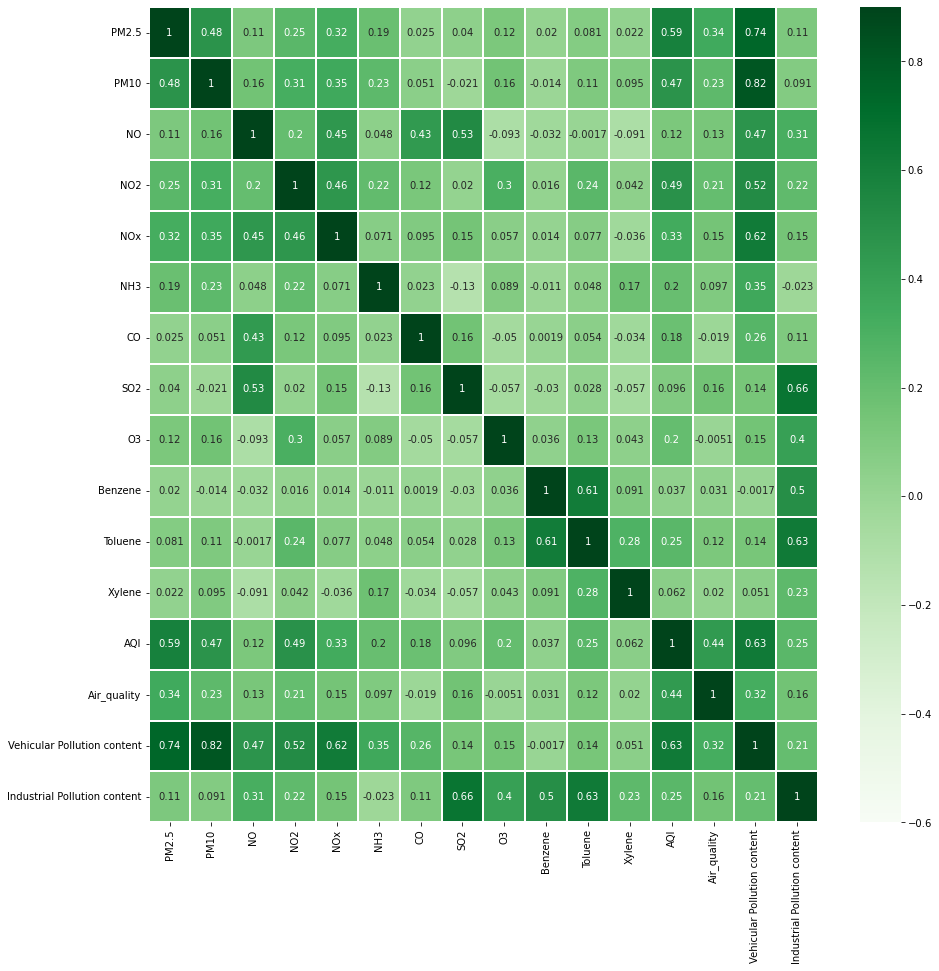

In [10]:
# Plotting heatmap to find the correlation between the columns
corr_matrix=df.corr()
plt.figure(figsize=(15,15))
sns.heatmap(corr_matrix,vmin=-0.6,vmax=0.9,linewidth=0.3,annot=True,cmap='Greens')
plt.show()

* **It seems that there is no high positive or negative correlation between Air quality and rest of the features.**

## Modelling - Classification

In [11]:
# Separate the data into feature data and target data (X and y, respectively)
x = df.drop(['Air_quality'],axis = 1)
y = df[['Air_quality']]


print(x.shape)
print(y.shape)

(29530, 15)
(29530, 1)


In [12]:
# splitting the data into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y,test_size = 0.2, random_state=0)

There are 17 classes of supervised learning models available in Scikit-Learn (Ver.1.0.2) at the time of creation of this notebook. Out of them we selected 7 Models which are best suited for our data.

In [13]:
# Importing confusion_matrix ,accuracy_score and classification report from sklearn.metrics
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

## 1) Support Vector Machine

In [14]:
# Importing svc model and fitting on train data 
from sklearn.svm import SVC
cls=SVC(kernel='poly',C=1.0)
cls.fit(X_train,y_train)
# make predictions on test data
svmpred=cls.predict(X_test)

In [15]:
# evaluate predictions
print(classification_report(y_test,svmpred))
print(confusion_matrix(y_test,svmpred))

              precision    recall  f1-score   support

           0       1.00      0.03      0.05       320
           1       0.97      0.90      0.93      2076
           2       0.97      0.95      0.96       658
           3       0.79      0.98      0.88      2033
           4       0.99      0.99      0.99       268
           5       0.97      0.98      0.98       551

    accuracy                           0.90      5906
   macro avg       0.95      0.80      0.80      5906
weighted avg       0.91      0.90      0.87      5906

[[   8    0    0  312    0    0]
 [   0 1859   14  203    0    0]
 [   0   23  625    0    0   10]
 [   0   43    0 1990    0    0]
 [   0    0    0    0  264    4]
 [   0    0    8    0    3  540]]


In [16]:
# evaluating accuracy
print('Train score :')
print(round(cls.score(X_train,y_train),4))
print('-'*40)
print('Test score :')
print(round(cls.score(X_test,y_test),4))

Train score :
0.8967
----------------------------------------
Test score :
0.895


## 2) Random Forest

In [17]:
# Importing Random Forest model and fitting on train data
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=10,max_depth = 3
                             , random_state = 0)
rf.fit(X_train,y_train)
# making prediction on test data
y_predrf = rf.predict(X_test)

In [18]:
# evaluate predictions
print(classification_report(y_test,y_predrf))
print(confusion_matrix(y_test,y_predrf))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       320
           1       0.87      1.00      0.93      2076
           2       0.81      0.75      0.78       658
           3       0.86      0.93      0.90      2033
           4       0.92      0.18      0.31       268
           5       0.68      0.82      0.74       551

    accuracy                           0.84      5906
   macro avg       0.69      0.61      0.61      5906
weighted avg       0.80      0.84      0.80      5906

[[   0   23    0  297    0    0]
 [   0 2068    0    8    0    0]
 [   0  104  493    0    1   60]
 [   0  137    0 1896    0    0]
 [   0   26   44    0   49  149]
 [   0   29   69    0    3  450]]


In [19]:
# evaluating accuracy
print('Train score :')
print(round(rf.score(X_train,y_train),4))
print('-'*40)
print('Test score :')
print(round(rf.score(X_test,y_test),4))

Train score :
0.8355
----------------------------------------
Test score :
0.8391


## 3) KNN classifier

In [20]:
# Importing KNN model and fitting on train data
from sklearn.neighbors import KNeighborsClassifier
acc_val=[]
neighbors=np.arange(3,15)
for k in neighbors:
    classifier=KNeighborsClassifier(n_neighbors=k,metric='minkowski')
    classifier.fit(X_train,y_train)
    y_pred=classifier.predict(X_test)
    acc=accuracy_score(y_test,y_pred)
    acc_val.append(acc)

Text(0, 0.5, 'accuracy')

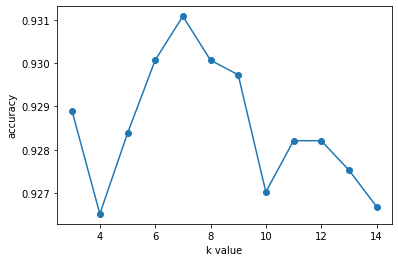

In [21]:
# plotting k nearest neibours
plt.plot(neighbors, acc_val, 'o-')
plt.xlabel('k value')
plt.ylabel('accuracy')

In [22]:

#finding best k
best_k = neighbors[acc_val.index(max(acc_val))]
print("The optimal number of neighbors is %d." % best_k)

The optimal number of neighbors is 7.


In [23]:
# making prediction using optimal number of neighbours
knn=KNeighborsClassifier(n_neighbors = 7,metric = 'minkowski')
knn.fit(X_train,y_train)
knn_pred = knn.predict(X_test)

In [24]:
# evaluate predictions
print(classification_report(y_test,knn_pred))
print(confusion_matrix(y_test,knn_pred))

              precision    recall  f1-score   support

           0       0.90      0.82      0.86       320
           1       0.94      0.95      0.94      2076
           2       0.92      0.90      0.91       658
           3       0.93      0.95      0.94      2033
           4       0.93      0.93      0.93       268
           5       0.91      0.93      0.92       551

    accuracy                           0.93      5906
   macro avg       0.92      0.91      0.92      5906
weighted avg       0.93      0.93      0.93      5906

[[ 263    2    0   55    0    0]
 [   0 1963   24   84    3    2]
 [   0   40  589    0    0   29]
 [  28   79    0 1925    0    1]
 [   0    0    0    0  248   20]
 [   0    0   24    0   16  511]]


In [25]:
# evaluating accuracy
print('Train score :')
print(round(knn.score(X_train,y_train),4))
print('-'*40)
print('Test score :')
print(round(knn.score(X_test,y_test),4))

Train score :
0.949
----------------------------------------
Test score :
0.9311


## 4) DecisionTreeClassifier

In [26]:
# Importing Decision tree model and fitting on train data
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(criterion='entropy'
                             , max_depth = 3
                             , random_state = 0)
tree.fit(X_train,y_train)
# making predictions on test data
y_pred_tree = tree.predict(X_test)

In [27]:
# evaluate predictions
print(classification_report(y_test,y_pred_tree))
print(confusion_matrix(y_test,y_pred_tree))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       320
           1       1.00      1.00      1.00      2076
           2       1.00      1.00      1.00       658
           3       1.00      1.00      1.00      2033
           4       0.00      0.00      0.00       268
           5       0.67      1.00      0.80       551

    accuracy                           0.95      5906
   macro avg       0.78      0.83      0.80      5906
weighted avg       0.92      0.95      0.94      5906

[[ 320    0    0    0    0    0]
 [   0 2076    0    0    0    0]
 [   0    0  658    0    0    0]
 [   0    0    0 2033    0    0]
 [   0    0    0    0    0  268]
 [   0    0    0    0    0  551]]


In [28]:
# evaluating accuracy
print('Train score :')
print(round(tree.score(X_train,y_train),4))
print('-'*40)
print('Test score :')
print(round(tree.score(X_test,y_test),4))

Train score :
0.9473
----------------------------------------
Test score :
0.9546


## 5) Gradient Boosting Classifier

In [29]:
# Importing Gradient Boosting model and fitting on train data
from sklearn.ensemble import GradientBoostingClassifier
gb_clf = GradientBoostingClassifier(n_estimators=20, max_features=2,
                                    max_depth=2, random_state=0)
gb_clf.fit(X_train, y_train)
# making prediction on test data
y_pred_gb = gb_clf.predict(X_test)

In [30]:
# evaluate preditions
print(classification_report(y_test,y_pred_gb))
print(confusion_matrix(y_test,y_pred_gb))

              precision    recall  f1-score   support

           0       1.00      0.67      0.80       320
           1       0.88      1.00      0.94      2076
           2       0.96      0.62      0.75       658
           3       0.95      1.00      0.97      2033
           4       0.98      0.88      0.93       268
           5       0.99      0.98      0.98       551

    accuracy                           0.93      5906
   macro avg       0.96      0.86      0.90      5906
weighted avg       0.94      0.93      0.93      5906

[[ 213    0    0  107    0    0]
 [   0 2072    0    0    4    0]
 [   0  249  409    0    0    0]
 [   0    1    0 2032    0    0]
 [   0   12   15    0  236    5]
 [   0   10    2    0    0  539]]


In [31]:
# evaluating accuracy
print('Train score :')
print(round(gb_clf.score(X_train,y_train),4))
print('-'*40)
print('Test score :')
print(round(gb_clf.score(X_test,y_test),4))

Train score :
0.9355
----------------------------------------
Test score :
0.9314


## 6) XG Boost Classifier

In [33]:
# Importing extra Gradient Boosting model
from xgboost import XGBClassifier
from xgboost import plot_importance

Feature Importances :  [7.4824915e-05 3.6530837e-05 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 1.1066479e-05 0.0000000e+00
 7.3463175e-06 0.0000000e+00 9.9985832e-01 1.1919969e-05 0.0000000e+00]


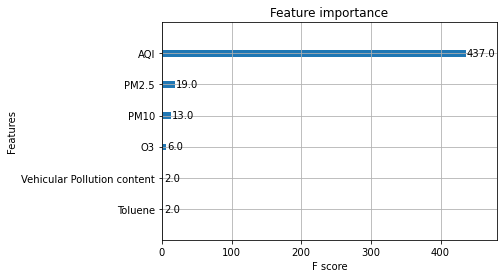

In [34]:
# fitting the model on training set and plotting a graph of feature importance in xgboost
xgb_model=XGBClassifier(eval_metric = 'mlogloss')
xgb_model.fit(X_train,y_train)
print('Feature Importances : ', xgb_model.feature_importances_)
plot_importance(xgb_model)

plt.show()

In [35]:
# making prediction on test data
y_pred=xgb_model.predict(X_test)


In [36]:
# evaluate predictions
print(classification_report(y_test,y_pred_gb))
print(confusion_matrix(y_test,y_pred_gb))

              precision    recall  f1-score   support

           0       1.00      0.67      0.80       320
           1       0.88      1.00      0.94      2076
           2       0.96      0.62      0.75       658
           3       0.95      1.00      0.97      2033
           4       0.98      0.88      0.93       268
           5       0.99      0.98      0.98       551

    accuracy                           0.93      5906
   macro avg       0.96      0.86      0.90      5906
weighted avg       0.94      0.93      0.93      5906

[[ 213    0    0  107    0    0]
 [   0 2072    0    0    4    0]
 [   0  249  409    0    0    0]
 [   0    1    0 2032    0    0]
 [   0   12   15    0  236    5]
 [   0   10    2    0    0  539]]


In [37]:
# evaluating accuracy
print('Train score :')
print(round(xgb_model.score(X_train,y_train),4))
print('-'*40)
print('Test score :')
print(round(xgb_model.score(X_test,y_test),4))

Train score :
1.0
----------------------------------------
Test score :
1.0


## 7) Cat Boost Classifier

In [38]:
# Importing Cat Boost model and fitting on train data
from catboost import CatBoostClassifier

CB_clf = CatBoostClassifier(iterations=2,
                          learning_rate=1,
                          depth=2)
CB_clf.fit(X_train, y_train)
# making prediction on test data
y_pred_CB = CB_clf.predict(X_test)

0:	learn: 0.6123847	total: 190ms	remaining: 190ms
1:	learn: 0.2002266	total: 204ms	remaining: 0us


In [39]:
# evaluate predicions
print(classification_report(y_test,y_pred_CB))
print(confusion_matrix(y_test,y_pred_CB))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       320
           1       0.98      0.99      0.99      2076
           2       0.97      1.00      0.99       658
           3       1.00      0.98      0.99      2033
           4       0.00      0.00      0.00       268
           5       0.67      1.00      0.80       551

    accuracy                           0.94      5906
   macro avg       0.77      0.83      0.79      5906
weighted avg       0.91      0.94      0.93      5906

[[ 320    0    0    0    0    0]
 [   0 2056   20    0    0    0]
 [   0    0  658    0    0    0]
 [   0   42    0 1991    0    0]
 [   0    0    0    0    0  268]
 [   0    0    0    0    0  551]]


In [40]:
# evaluating accuracy
print('Train score :')
print(round(CB_clf.score(X_train,y_train),4))
print('-'*40)
print('Test score :')
print(round(CB_clf.score(X_test,y_test),4))

Train score :
0.936
----------------------------------------
Test score :
0.9441


### Comparison:

|Model  |Accuracy on Training set  |Accuracy on Test set|Precision score|Recall score|F1 score|
|---|---|---|---|---|---|
|Support Vector Machine|0.896|0.895|0.0.79|0.90|0.88|
|Random Forest|0.835|0.839|0.68|0.75|0.74|
|KNN |0.948|0.931|0.90|0.82|0.86|
|Dicision Tree|0.947|0.954|1.0|1.0|0.80|
|Gradient Boost|0.935|0.931|0.88|0.88|0.93|
|Extra Gradient Boost|1.0|1.0|0.88|0.88|0.93|
|Cat Boost|0.936|0.944|0.98|0.98|0.80|

### Inference:

### We can say that we are getting the best results from Random Forest Classifier , we can try it with different parameters and different training sizes to see a slightly deviated results or more accurate results.

## Fine Tuning

Tuning a classifier for maximum sensitivity or specificity can be achieved in (at least) two main steps. The first is using GridSearchCV to fine tune your model and keep the classifier with the highest recall score. The second step is to adjust the decision threshold using the precision recall curve and the roc curve. Here we are using GridSearchCV for fine tuning Random Forest Classifier.

In [41]:
# Importing grid searchCV for hyper tuning the model
from sklearn.model_selection import GridSearchCV
# Create a based model
rf=RandomForestClassifier(random_state=0)

In [42]:
# Create the parameter grid 
param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

In [43]:
# Instantiate the grid search model
CV_rf = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5)
# Fit the grid search to the data
CV_rf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=0),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [200, 500]})

In [44]:
print(CV_rf.best_params_)

{'criterion': 'gini', 'max_depth': 8, 'max_features': 'auto', 'n_estimators': 500}


In [45]:
# create tuned model and fitting on train data
rf1=RandomForestClassifier(random_state=0, max_features='auto', n_estimators= 500, max_depth=8, criterion='gini')
rf1.fit(X_train, y_train)
# making prediction
pred=rf1.predict(X_test)

In [47]:
# evaluate accuracy of prediction
print("Accuracy for fine tuned Random Forest Model: ",round(accuracy_score(y_test,pred),4))

Accuracy for fine tuned Random Forest Model:  0.9961


### Result:

### Random Forest Classifier provides best predictions among all other ML Models employed here(according to the accuracy and f1 scores).